***Import libraries***

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

***Load File***

In [2]:
df=pd.read_csv("C:/Users/dmehe/Downloads/Data_Analysis_Data_Set/hotel_bookings.csv")


Data Analysis and Data cleaning

In [3]:
df.shape

(119390, 32)

In [5]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [35]:
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'],format="%d/%m/%Y")

In [14]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [16]:
df.drop(['company','agent'],axis=1,inplace=True)

In [17]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [18]:
df.dropna(inplace=True)

# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)

In [20]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


Remove outlayer value 

<Axes: >

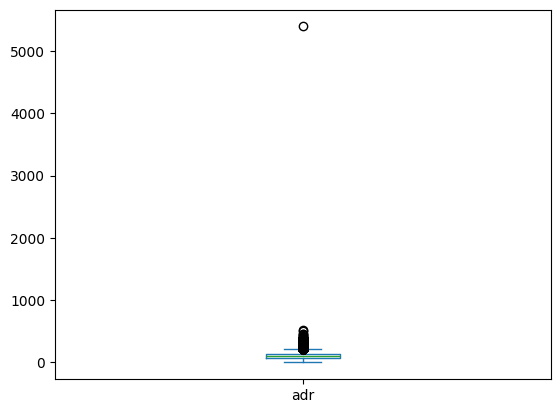

In [15]:
df['adr'].plot(kind='box')

In [21]:
df=df[df['adr']<4000]

In [23]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,118897,118897,118897,118897,118897,118897,118897,118897,118897,118897,118897
unique,2,12,5,177,7,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79301,13852,91862,48585,56402,97729,85600,73862,104163,89173,74745


In [26]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('-'*60)

hotel
['Resort Hotel' 'City Hotel']
------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
------------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 

Data Analysis and Data visualizations

In [62]:
cancel_perc=df['is_canceled'].value_counts(normalize=True)
cancel_perc


is_canceled
0    0.629584
1    0.370416
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Reservation status count')

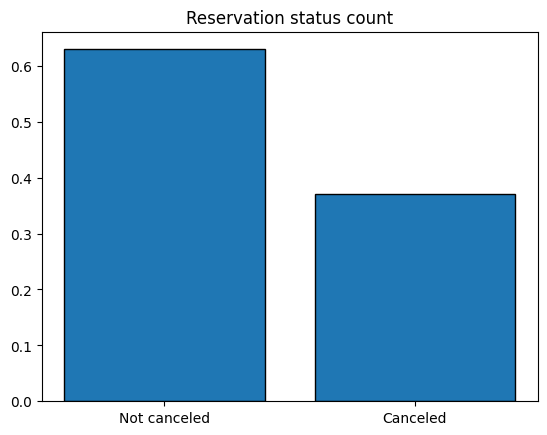

In [63]:
_=plt.bar(['Not canceled','Canceled'],cancel_perc,edgecolor='Black')
plt.title('Reservation status count')

The above bar ghaph shows the percentage of reservation that are canceled and those are not. It is obvious that thare are still a significant number of reservation that have not been canceled. There are still 37% of clients who canceled their reservation, which has a significant impact on the hotel's earning.

Alternative Method to count Not canceled and Canceled 

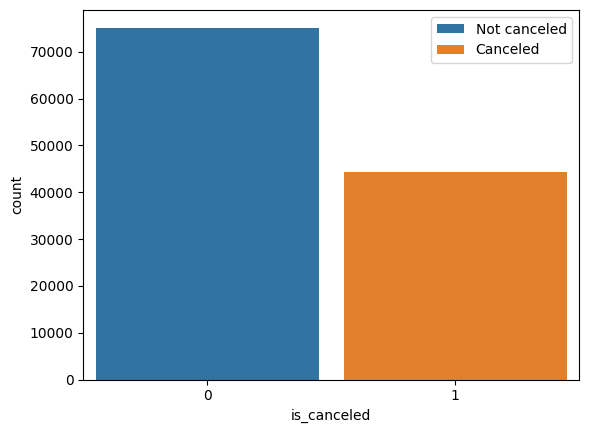

In [64]:
_=sns.countplot(x='is_canceled',data=df,hue='is_canceled',width=.9)
plt.legend(['Not canceled','Canceled'])

Text(0, 0.5, 'Number of reservation')

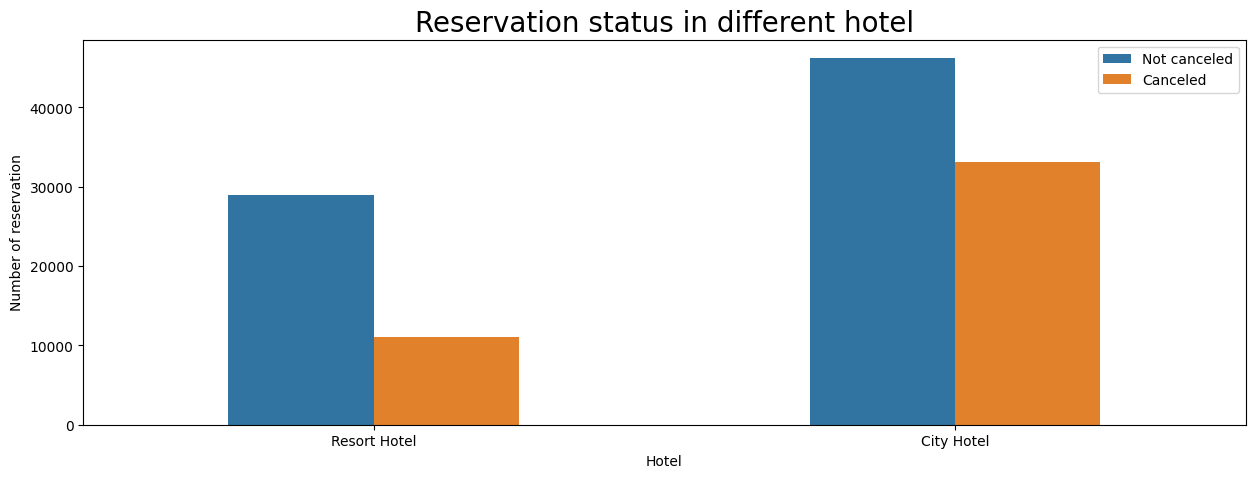

In [22]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x='hotel',hue='is_canceled',width=.5,data=df)
plt.legend(['Not canceled','Canceled'])
plt.title('Reservation status in different hotel',size=20)
plt.xlabel('Hotel')
plt.ylabel('Number of reservation')

In comparison to resort hotels, city hotels have more bookings. It's possible that resort hotels are more expensive that those in cities.

In [22]:
resort_hotel=df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)


is_canceled
0    0.722366
1    0.277634
Name: proportion, dtype: float64

In [23]:
city_hotel=df[df['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.58273
1    0.41727
Name: proportion, dtype: float64

In [25]:
resort_hotel=resort_hotel.groupby(['reservation_status_date'])[['adr']].mean()
city_hotel=city_hotel.groupby(['reservation_status_date'])[['adr']].mean()


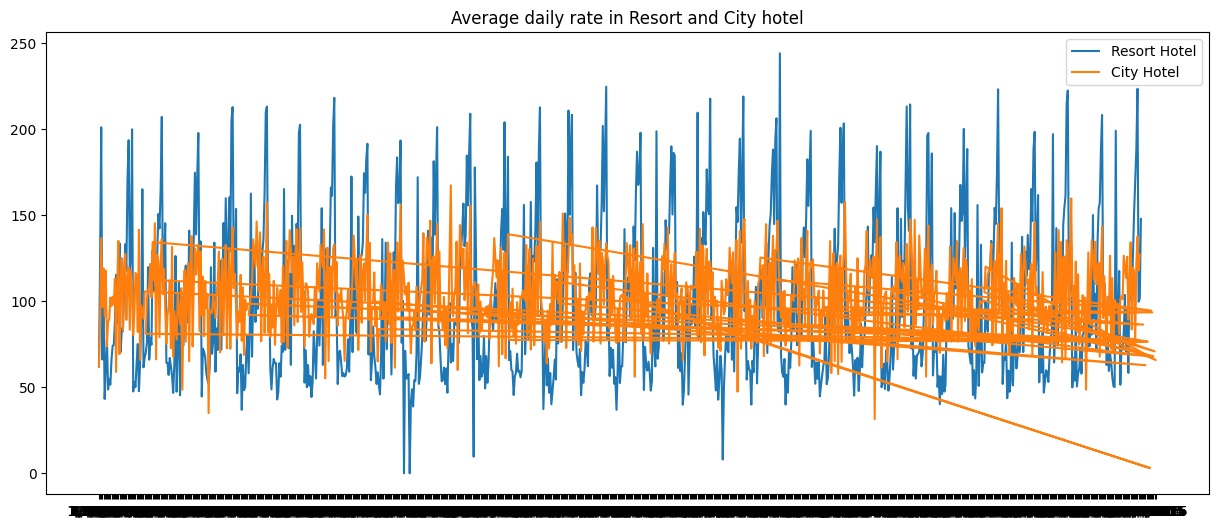

In [33]:
plt.figure(figsize=(15,6))
plt.title('Average daily rate in Resort and City hotel')
plt.plot(resort_hotel.index,resort_hotel['adr'],label='Resort Hotel')
plt.plot(city_hotel.index,city_hotel['adr'],label='City Hotel')
plt.legend()

The above line graph shows that, on certain days, adr for a city hotel is less than resort hotel, and on other days, it is even less and also see that the weekends and holidays price may rise in resort hotel.  

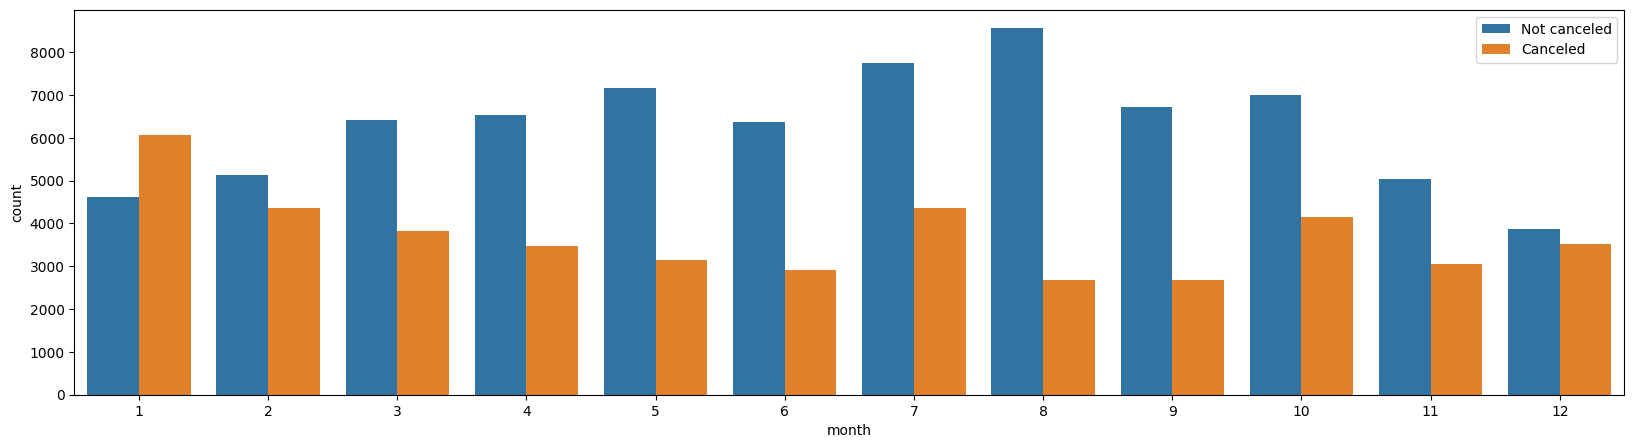

In [36]:
df['month']=df['reservation_status_date'].dt.month
plt.figure(figsize=(20,5))
sns.countplot(x='month',hue='is_canceled',data=df)
plt.legend(['Not canceled','Canceled'])


From above bar ghaph we clearly see that the number of confirmed reservation highest in August and the number of canceled reservation highest in January.

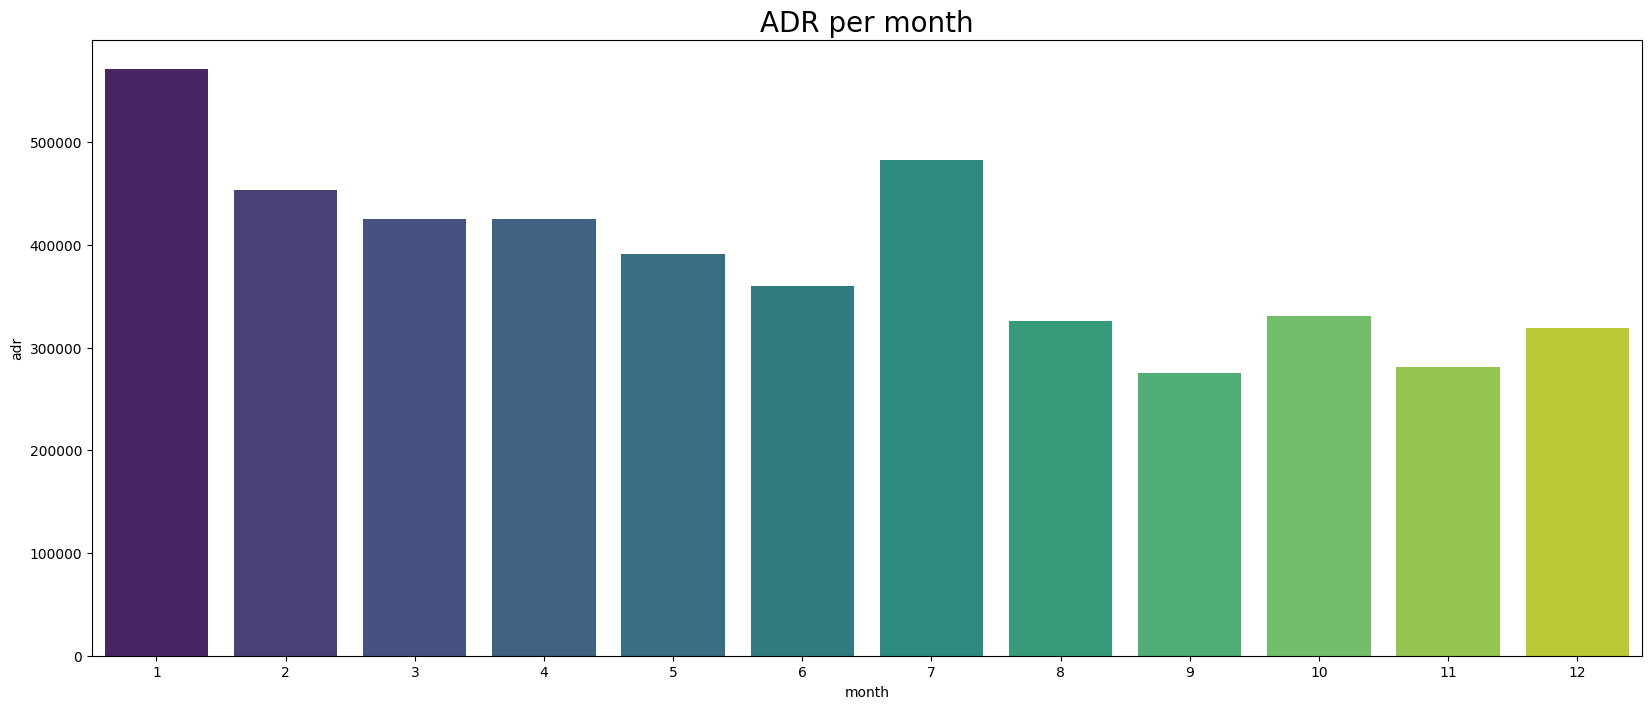

In [66]:
plt.figure(figsize=(20,8))
plt.title('ADR per month',size=20)
ax=df[df['is_canceled']==1].groupby(['month'],as_index=False)['adr'].sum()
axis=sns.barplot(x='month',y='adr',data=ax,palette='viridis')


Now, let's see which country has the highest reservation canceled. 

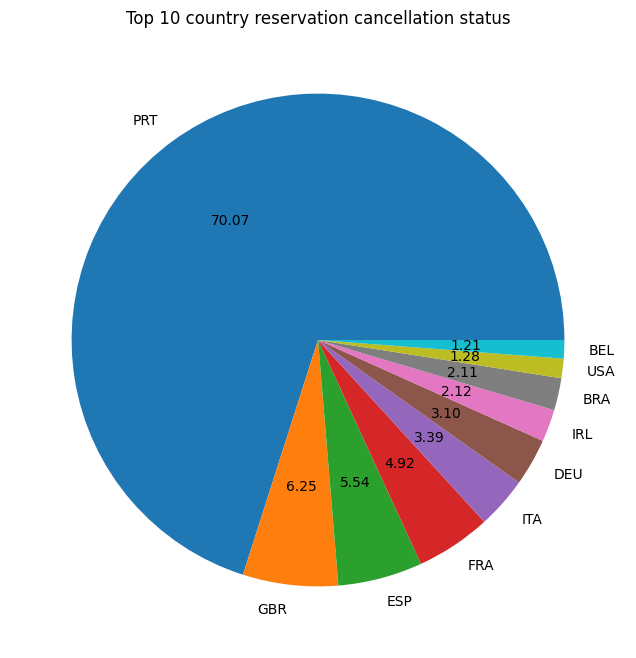

In [78]:
cancl_data=df[df['is_canceled']==1]
top_10_contry=cancl_data['country'].value_counts()[:10]
plt.figure(figsize=(8,8))
plt.title('Top 10 country reservation cancellation status',size=12)
_=plt.pie(top_10_contry,labels=top_10_contry.index,autopct='%.2f',)

The top country  is Portugal with highest number of cancellations.

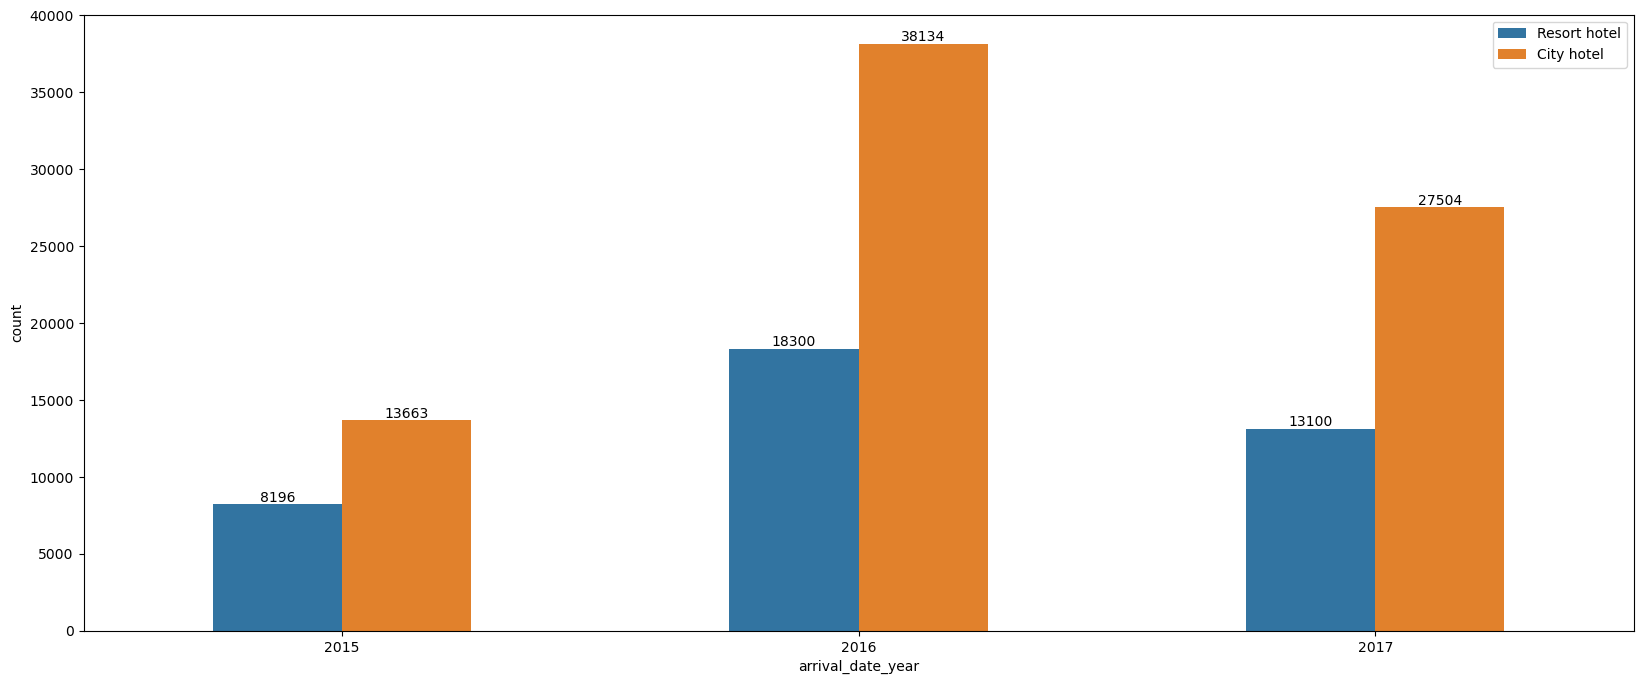

In [194]:
plt.figure(figsize=(20,8))

ax=sns.countplot(x='arrival_date_year',hue='hotel',width=.5,data=df)
plt.legend(['Resort hotel','City hotel'])
for bars in ax.containers:
    ax.bar_label(bars)

The above graph shows that year 2016 has highest number of resort hotel and city hotel bookings.

In [3]:
ax=df.groupby(['customer_type'])['hotel'].count().reset_index()
ax

,customer_type,hotel
0,Contract,4076
1,Group,577
2,Transient,89613
3,Transient-Party,25124


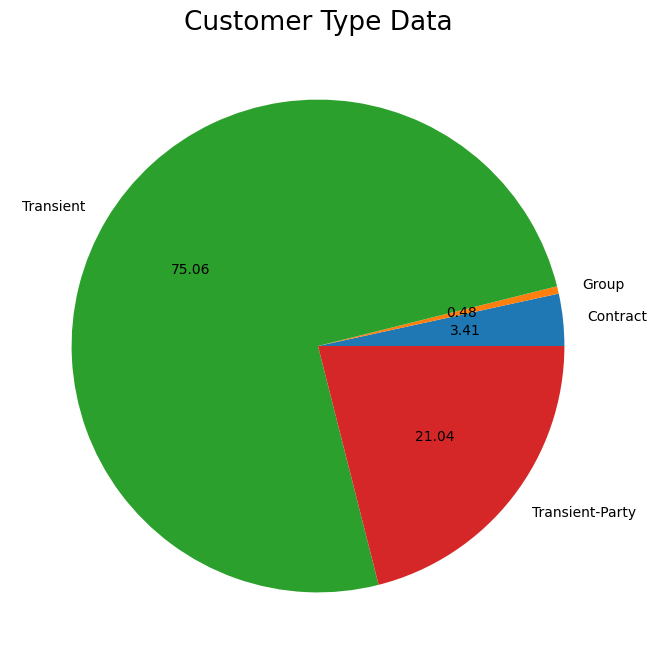

In [76]:
ax=df.groupby(['customer_type'])['hotel'].count()
plt.figure(figsize=(8,8))
plt.title('Customer Type Data',size=19)
_=plt.pie(ax.values,labels=ax.index,labeldistance=1.1,autopct='%.2f')


In [ ]:
From above graph we analyze that the highest number of Transient customers are booking hotel.


# Conclusion

In [ ]:
1. Cancellation rates rise as the price does. In order to prevent cancellation of reservations, hotels could work on their pricing strategies and try to lower the rates for specific hotel based on locations.
                                                                                                                                                                
2. As the ratio of cancellation and not cancellation of the resort hotel is higher than city hotel. So the hotels should provide special discount offers on the room price on weekends and holidays.

3. In the month of January, hotels can start marketing with a reasonable amount to increase their revenue as the cancellation is the highewst in this month.

    Thanks You.